In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
bike_rental = pd.read_csv('hour.csv')
bike_rental.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

(array([ 6972.,  3705.,  2659.,  1660.,   987.,   663.,   369.,   188.,
          139.,    37.]),
 array([   1. ,   98.6,  196.2,  293.8,  391.4,  489. ,  586.6,  684.2,
         781.8,  879.4,  977. ]),
 <a list of 10 Patch objects>)

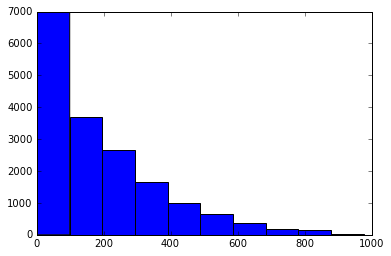

In [5]:
plt.hist(bike_rental['cnt'])

In [26]:
bike_rental.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
time_label   -0.378318
Name: cnt, dtype: float64

In [14]:
def assign_label(hour):
    if 0<=hour<6:
        return 4
    elif 6<=hour<12:
        return 1
    elif 12<=hour<18:
        return 2
    elif 18<=hour<=24:
        return 3
    
bike_rental['time_label'] = bike_rental['hr'].apply(assign_label)
bike_rental.head()       

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   time_label  
0           4  
1           4  
2           4  
3           4  
4           4

In [25]:
train = bike_rental.sample(frac = 0.8,random_state = 1)
test_id = ~bike_rental.index.isin(train.index)
test = bike_rental.loc[test_id]

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pred = list(train.columns)
pred.remove('dteday')
pred.remove('cnt')
pred.remove('casual')
pred.remove('registered')
target = ['cnt']
ss = StandardScaler()
lr = LinearRegression()
train[pred] =ss.fit_transform(train[pred])
test[pred] = ss.transform(test[pred])
lr.fit(train[pred],train[target])
test_pred = lr.predict(test[pred])
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true = test[target], y_pred = test_pred)
MSE

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.51369993149928783

In [68]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf = 30)
tree.fit(train[pred],train[target])
test_pred = tree.predict(test[pred])
MSE = mean_squared_error(y_true = test[target], y_pred = test_pred)
MSE

0.10044008277812937

In [72]:
from sklearn.ensemble import RandomForestRegressor
rt = RandomForestRegressor(n_estimators = 1000,max_depth = 5)
rt.fit(train[pred],train[target])
test_pred = rt.predict(test[pred])
MSE = mean_squared_error(y_true = test[target], y_pred = test_pred)
MSE

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.33533128775810123